# Forecast the CocaCola prices

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as smf

In [3]:
df=pd.read_excel('C:/Users/RIG1/Desktop/DS ASSIGNMENTS/QUESTIONS -all assignments/ASS 18-forecasting/CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
df.shape

(42, 2)

<AxesSubplot:>

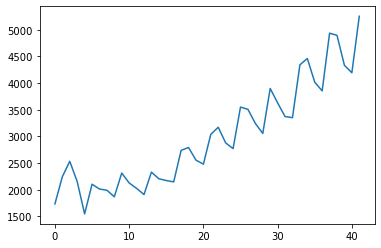

In [8]:
df.Sales.plot()

### Above plot shows upward trend as the seasonality is not much clear

# Below is the way to convert quarterly periods to datetime in pandas

In [9]:
#Clean way to convert quarterly periods to datetime in pandas

df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))


df.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


## So, let's extract (Quarter) from  (Quarter_Year) column

In [10]:
def separateQuarter(x):
    list = x.split('_')
    return list[0]

df['quarters'] = df['Quarter'].apply(separateQuarter)

# dummy = pd.DataFrame(pd.get_dummies(ds['quarters']))
# df = pd.concat([df,dummy], axis=1)
df.head()

,Quarter,Sales,Quarter_Year,quarters
0,Q1_86,1734.827000,Q1 1986,Q1
1,Q2_86,2244.960999,Q2 1986,Q2
2,Q3_86,2533.804993,Q3 1986,Q3
3,Q4_86,2154.962997,Q4 1986,Q4
4,Q1_87,1547.818996,Q1 1987,Q1


## So, let's extract (year) from (Quarter_Year) column

In [11]:
def seperateyear(x):
    items  = x.split('_')
    year   = items[1]
    seperateyear = '19'+year
    return int(seperateyear)

df['year'] = df['Quarter'].apply(seperateyear)
df.head()

,Quarter,Sales,Quarter_Year,quarters,year
0,Q1_86,1734.827000,Q1 1986,Q1,1986
1,Q2_86,2244.960999,Q2 1986,Q2,1986
2,Q3_86,2533.804993,Q3 1986,Q3,1986
3,Q4_86,2154.962997,Q4 1986,Q4,1986
4,Q1_87,1547.818996,Q1 1987,Q1,1987


# create dummy variables now

In [12]:
dummy_quarter = pd.DataFrame(pd.get_dummies(df['quarters']))
df = pd.concat([df,dummy_quarter], axis=1)
df.head()

,Quarter,Sales,Quarter_Year,quarters,year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,Q1,1986,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,Q2,1986,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,Q3,1986,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,Q4,1986,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,Q1,1987,1,0,0,0


In [13]:
df.shape

(42, 9)

# create ----- t,t_square,log_sales
# (because we will use them in model building)

In [14]:
df["t"] = np.arange(0,42) # or(1,43) ------43 is excluded
df["t_squared"] = df["t"]*df["t"]
df["log_sales"] = np.log(df["Sales"])
df.columns
df.head()


# ******************** OR THE OTHER WAY TO DO  THIS IS ************************


# t_list = [x for x in range(1,len(df)+1)]
# df['t'] = t_list
# df['t_square'] = df['t']*df['t']
# #log transformation
# df['log_sales'] = np.log10(df.Sales)
# df.head()

,Quarter,Sales,Quarter_Year,quarters,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1 1986,Q1,1986,1,0,0,0,0,0,7.458663
1,Q2_86,2244.960999,Q2 1986,Q2,1986,0,1,0,0,1,1,7.716443
2,Q3_86,2533.804993,Q3 1986,Q3,1986,0,0,1,0,2,4,7.837477
3,Q4_86,2154.962997,Q4 1986,Q4,1986,0,0,0,1,3,9,7.675529
4,Q1_87,1547.818996,Q1 1987,Q1,1987,1,0,0,0,4,16,7.344602


<AxesSubplot:xlabel='quarters', ylabel='year'>

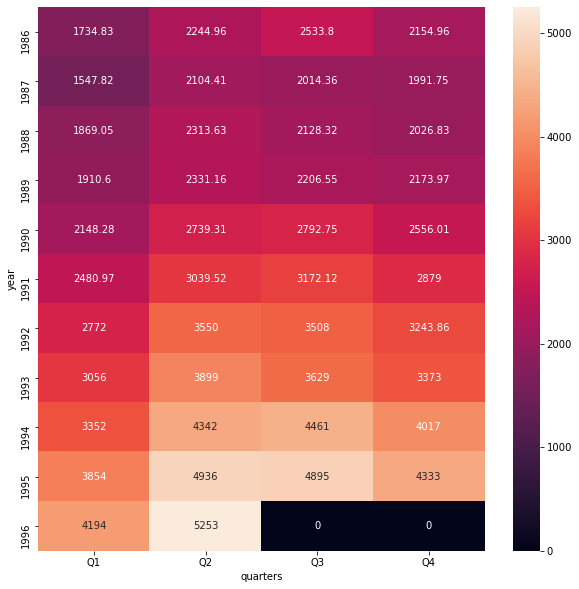

In [15]:
plt.figure(figsize=(10,10))
heat=pd.pivot_table(data=df,values='Sales',index='year',columns='quarters',aggfunc='mean',fill_value=0)
sns.heatmap(heat,annot=True,fmt='g')# fmt= formating string applied to arrays #'g'=General format for floating values
# without fmt='g' values showing is not in proper manner

### Q2 - MEANS APRIL,MAY,JUNE
### during 2nd quarter the sale of coca-cola is more as compared with other months.
### on the other hand Q3,Q4 has leasts number of sales

# BOXPLOT

<AxesSubplot:xlabel='year', ylabel='Sales'>

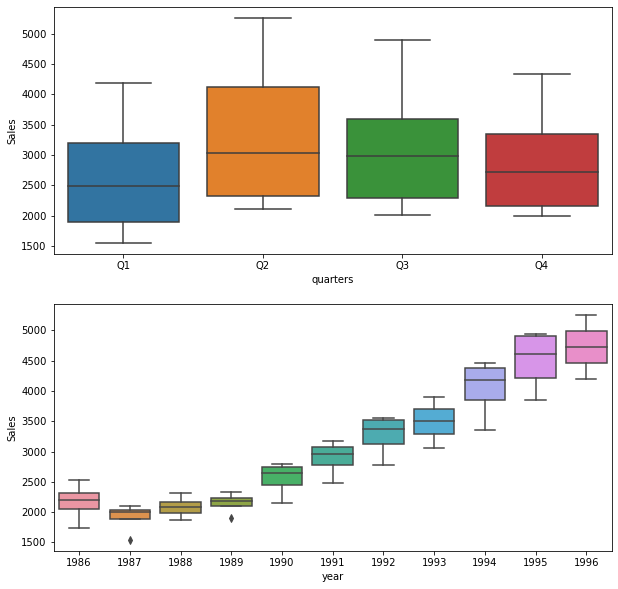

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(x='quarters',y='Sales',data=df)
plt.subplot(212)
sns.boxplot(x='year',y='Sales',data=df)

### As we can see clearly the number of coca-cola sales are increasing from the year 1986 to 1996
### Q2 has more number of sales as compared with Q3 AND Q4

# Line plot -- for year

<AxesSubplot:xlabel='year', ylabel='Sales'>

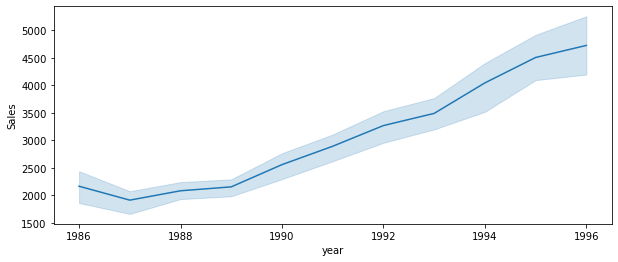

In [17]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year',y='Sales',data=df)

### If we focus on overeall pattern then we can see the trend is moving upward

# line plot --for quarters

<AxesSubplot:xlabel='quarters', ylabel='Sales'>

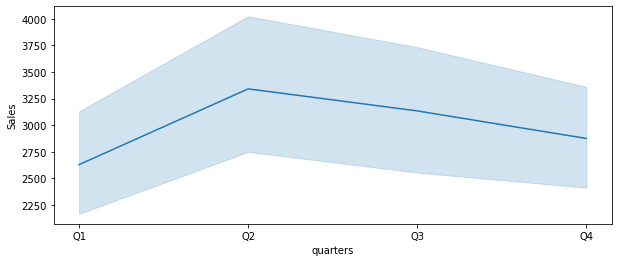

In [18]:
plt.figure(figsize=(10,4))
sns.lineplot(x='quarters',y='Sales',data=df)

### Q2-apr,may,jun showing more number of sales of cola-cola drink

# train test split

In [19]:
Train = df.head(30)
Test = df.tail(12)

# Build model
## linear model

In [20]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  714.014448328131


# Exponential model

In [21]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  552.2821039079397


# Quadratic

In [22]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad = round(rmse_Quad,2)
rmse_Quad

646.27

# Additive seasonality 

In [23]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea = round(rmse_add_sea,2)
rmse_add_sea

1778.01

# Additive Seasonality Quadratic 

In [24]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad = round(rmse_add_sea_quad,2)
rmse_add_sea_quad

586.05

# Multiplicative Seasonality

In [25]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',
                  data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea = round(rmse_Mult_sea,2)
rmse_Mult_sea

1828.92

# Multiplicative Additive Seasonality 

In [26]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea = round(rmse_Mult_add_sea,2)
rmse_Mult_add_sea

410.25

# comparing the results/RMSE

In [27]:
#I DID IN THE PREVIOUS ASSIGNMENT:-
# data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),
#         "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea])}
# table_rmse=pd.DataFrame(data)
# table_rmse


# ******************************** OR THE OTHER WAY TO DO THIS IS ****************************************


model_list = ["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
                                 "rmse_Mult_add_sea"]
rmse_val_list = [rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                 rmse_Mult_add_sea]

table_rmse = pd.DataFrame(columns=['Model','RMSE Values'])
table_rmse['Model'] = model_list
table_rmse['RMSE Values'] = rmse_val_list

table_rmse.sort_values(by=['RMSE Values']) # sorting all the rmse values small to big

,Model,RMSE Values
6,rmse_Mult_add_sea,410.250000
1,rmse_Exp,552.282104
4,rmse_add_sea_quad,586.050000
2,rmse_Quad,646.270000
0,rmse_linear,714.014448
3,rmse_add_sea,1778.010000
5,rmse_Mult_sea,1828.920000


### rmse_Mult_add_sea is giving less error. less the error, less the difference between actual values and  predicted values.

### Hence we choose this model for prediction

In [35]:
df.head()

,Quarter,Sales,Quarter_Year,quarters,year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1 1986,Q1,1986,1,0,0,0,0,0,7.458663
1,Q2_86,2244.960999,Q2 1986,Q2,1986,0,1,0,0,1,1,7.716443
2,Q3_86,2533.804993,Q3 1986,Q3,1986,0,0,1,0,2,4,7.837477
3,Q4_86,2154.962997,Q4 1986,Q4,1986,0,0,0,1,3,9,7.675529
4,Q1_87,1547.818996,Q1 1987,Q1,1987,1,0,0,0,4,16,7.344602


In [52]:
final_Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = df).fit()
pred = pd.Series(final_Mul_Add_sea.predict(Test))
rmse = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred)))**2))
final_rmse_Mult_add_sea = round(rmse,2)
final_rmse_Mult_add_sea

172.15

In [53]:
pred_df = pd.DataFrame({'Actual' : df.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


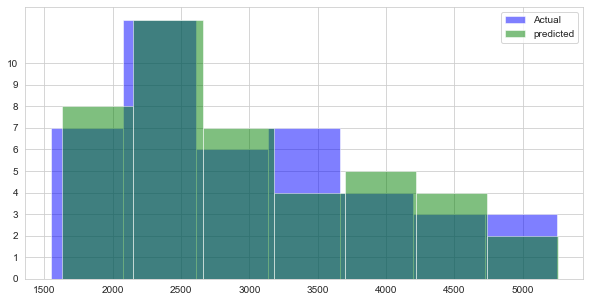

In [62]:
# Actual Vs Predicted graph

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 5) 
_, ax = plt.subplots()
ax.hist(df.Sales, color = 'b', alpha = 0.5, label = 'Actual', bins=7)
ax.hist(pred_final, color = 'g', alpha = 0.5, label = 'predicted', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Conclusion

we created four dummy variables------ Q1,Q2,Q3,Q4 

rmse_Mult_add_sea is giving less error. Hence we choose it for final model prediction.